# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt>?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

1. A Hamiltonian is an operator that when applied to a system, gives the total energy of that system (Wikipedia)(Britanica).
2. The Coulomb force law.
3. An eigenstate of a quantized dynamic system is a state in which one of the defining variables has a determinate fixed value (Merriam-Webster).

In [5]:
import sys
!{sys.executable} -m pip install qmsolve

  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=25044c41f6ff0edd906e3c1ec076108ac2ce47eec4b5b1c4c5c8364b690e06cd
  Stored in directory: /Users/haydenatkinson/Library/Caches/pip/wheels/d7/d9/89/a3f31c76ff6d51dc3b1575628f59afe59e4ceae3f2748cd7ad
Successfully built progressbar


In [6]:
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Computing...
Took 0.028399944305419922
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


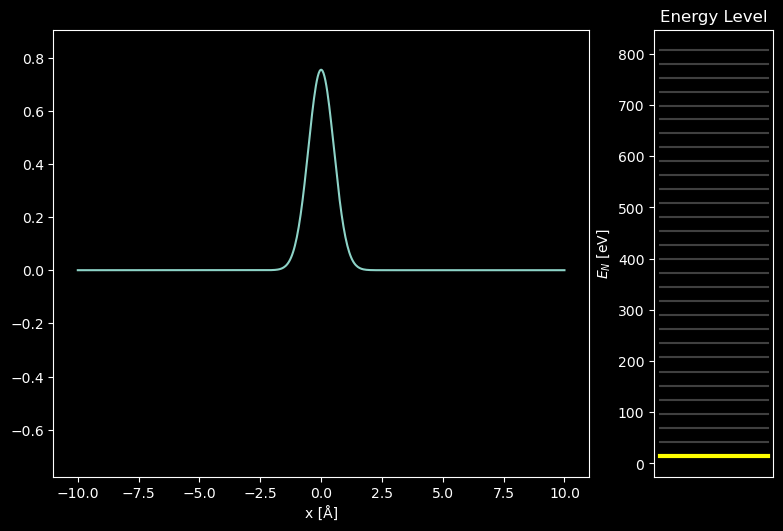

In [19]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)

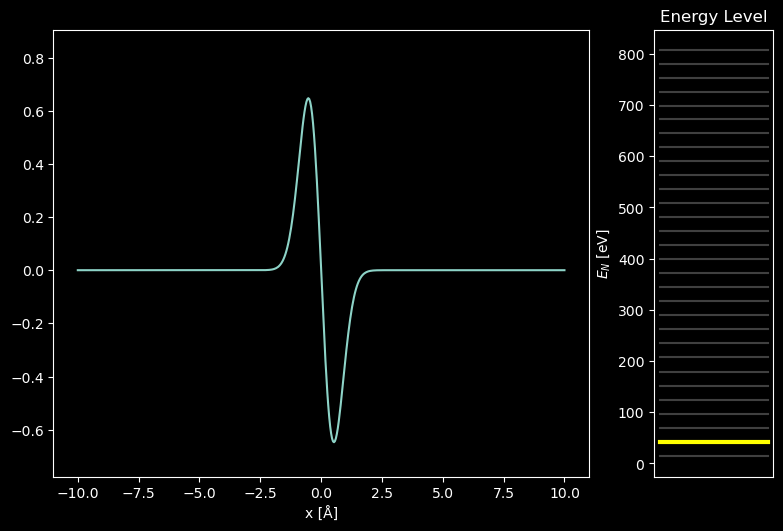

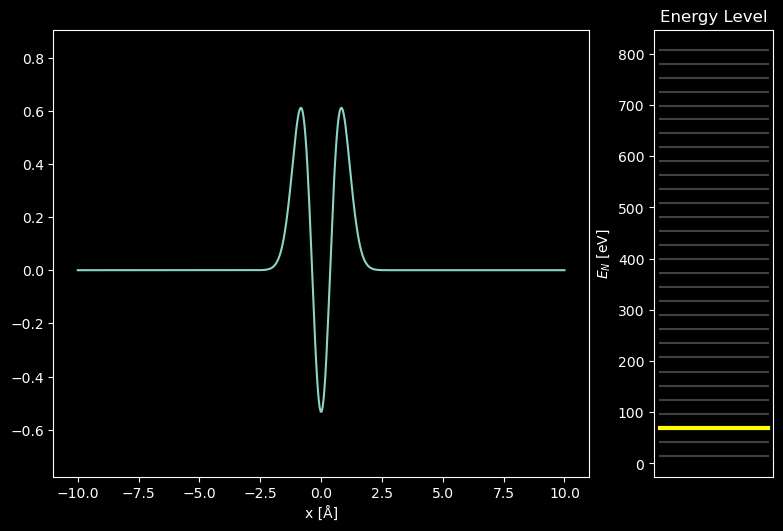

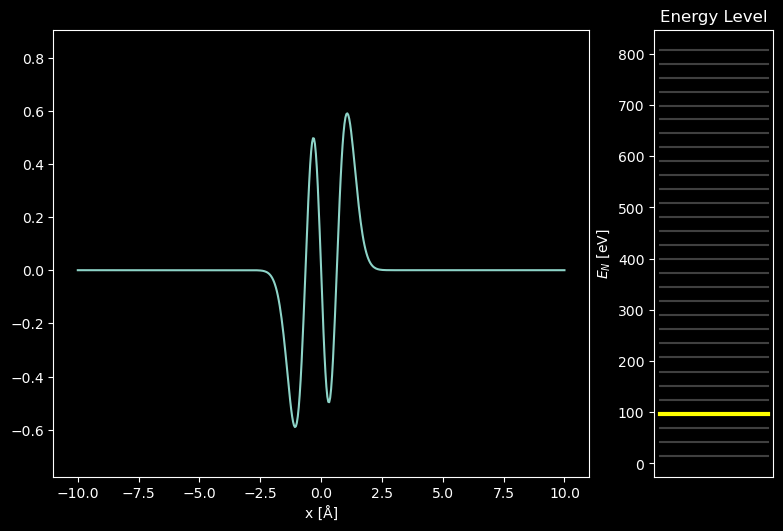

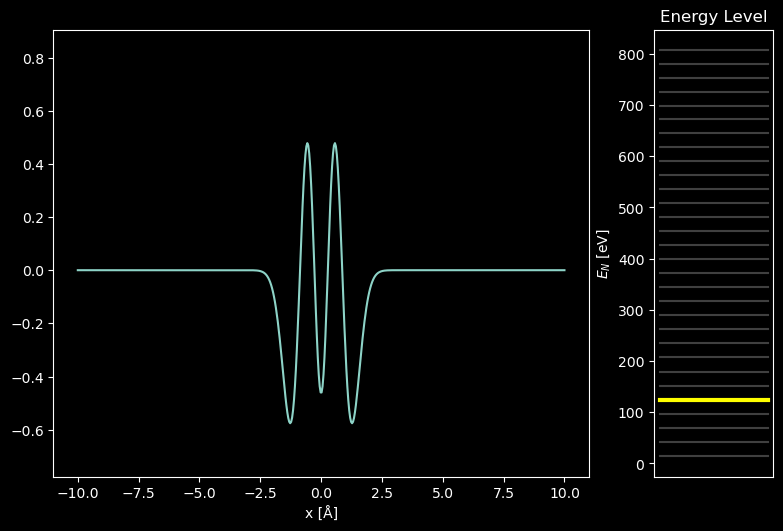

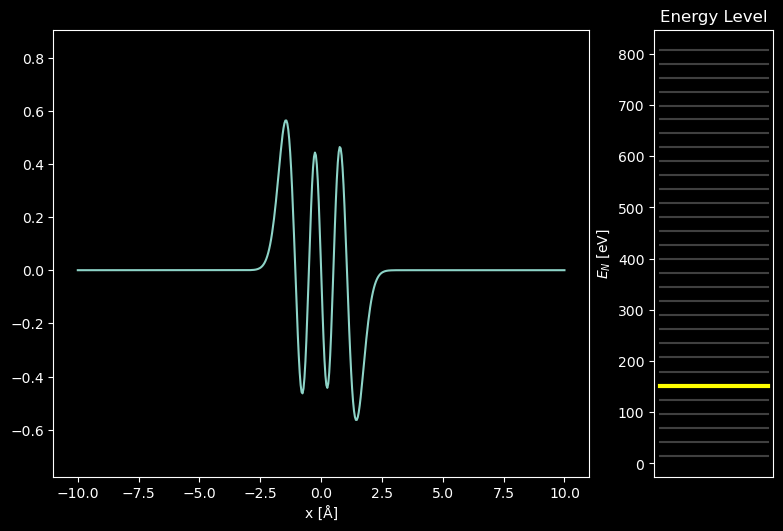

In [21]:
visualization.plot_eigenstate(1)
visualization.plot_eigenstate(2)
visualization.plot_eigenstate(3)
visualization.plot_eigenstate(4)
visualization.plot_eigenstate(5)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

5. Distance.
6. Wave functions; they take on negative values, and you can't have a negative probability.

Computing...
Took 0.039035797119140625
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


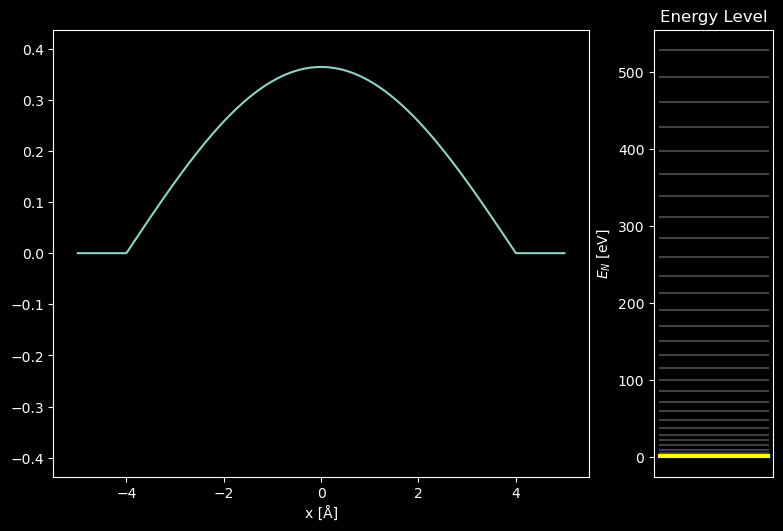

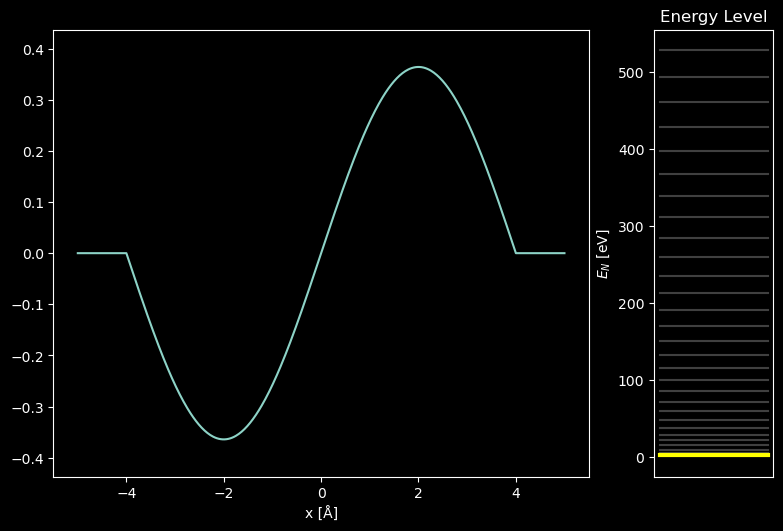

In [23]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class on 4/17)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

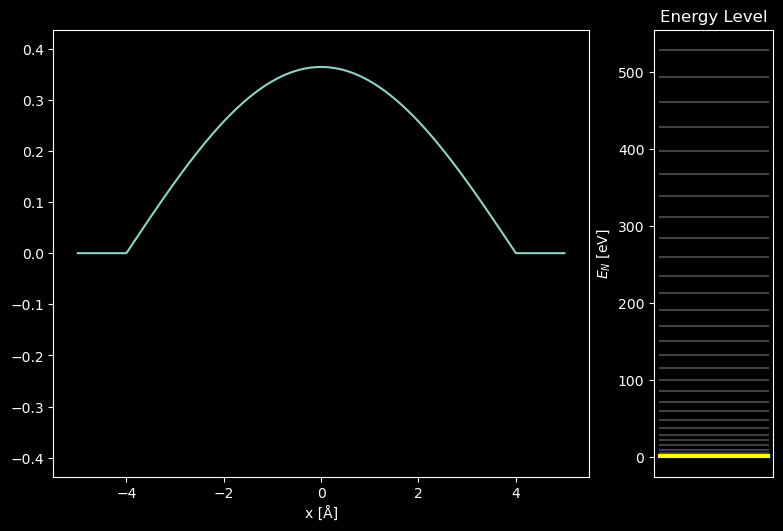

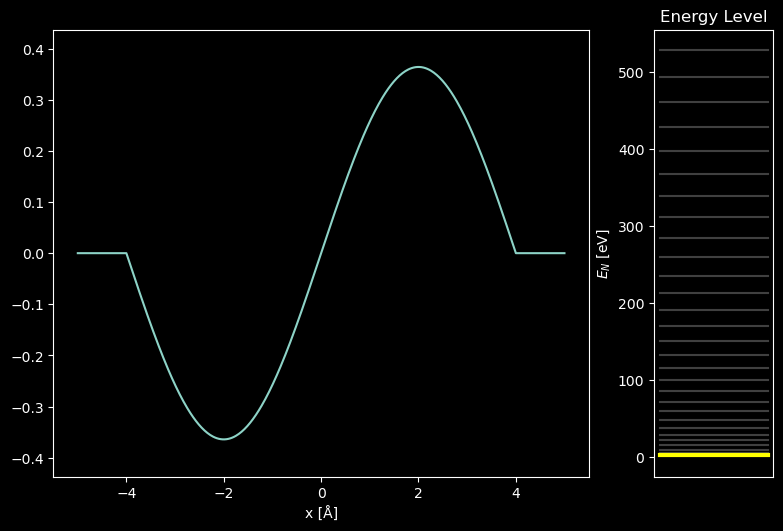

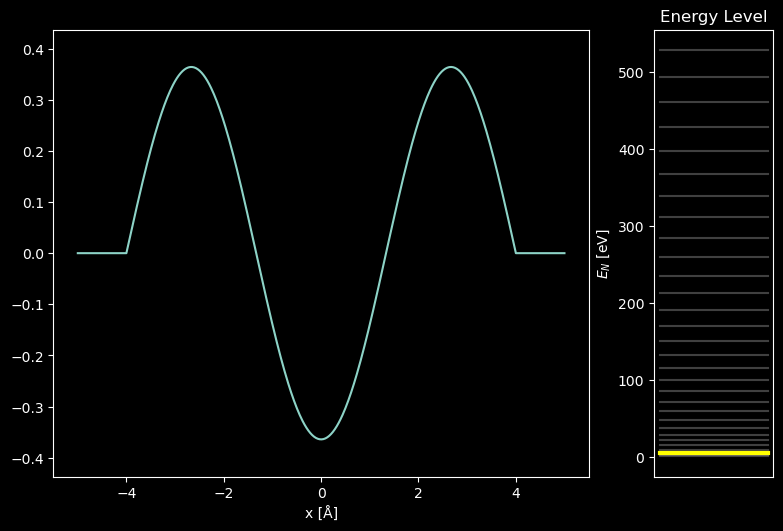

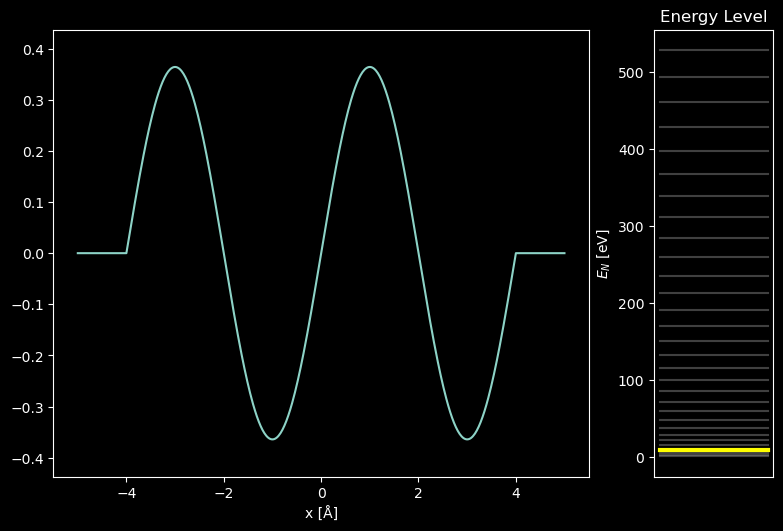

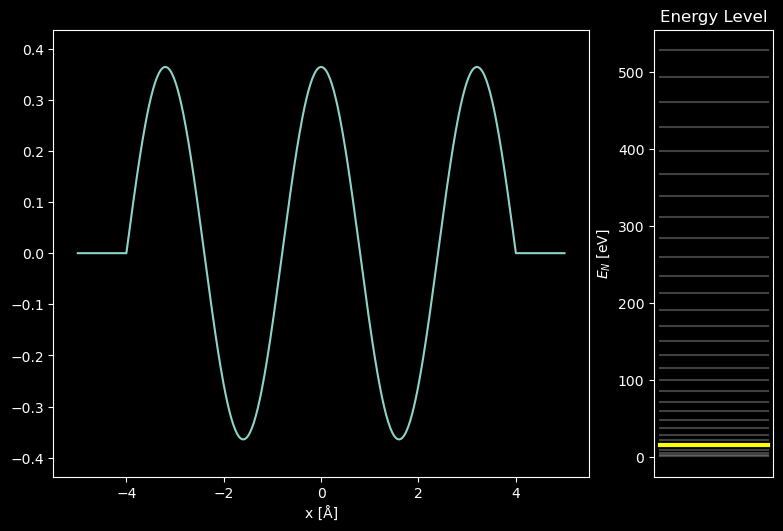

In [24]:
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)
visualization_sw.plot_eigenstate(2)
visualization_sw.plot_eigenstate(3)
visualization_sw.plot_eigenstate(4)

8. The SHO eigenstates have bell curves with tapered ends, while the square-well eigenstates have waves. This is because the SHO is not bound by walls, and because the probability has to =1 when integrated over the domain, they end up having tapered ends. In the case of a square-well, however, the particle is bound by walls and as such the wavefunction is allowed to take on a pure sinusoidal shape.
9. The number of peaks and troughs in each eigenstate equals the quantum number.

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

Computing...
Took 0.02270197868347168
[  1.96316248   7.83801955  17.57694191  31.08530539  48.18422
  68.49522093  90.84870807 103.48134831 104.47427239 111.67946752
 116.46777828 122.00163272 133.48303033 139.44964046 150.89855465
 162.88069361 171.8341233  186.69398533 200.19441007 212.13582424
 229.32795439 245.0224433  259.60738786 278.82158437 297.01311037
 314.01238569 335.11613714 355.92838355 375.26882509 398.15648271]


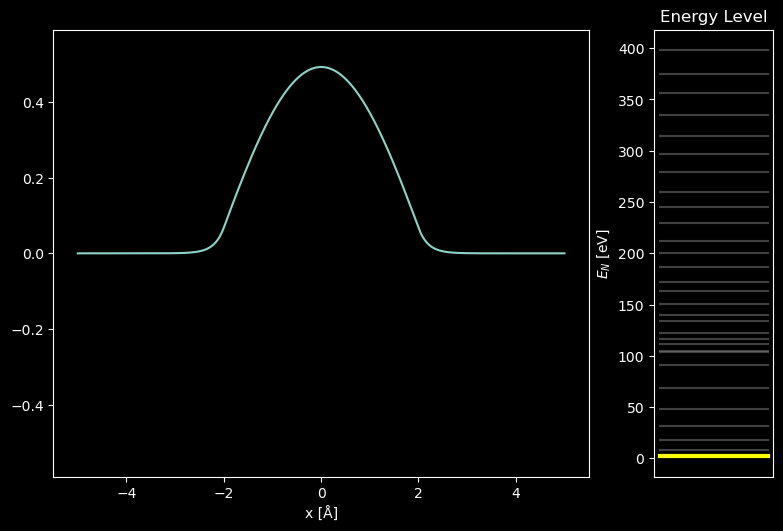

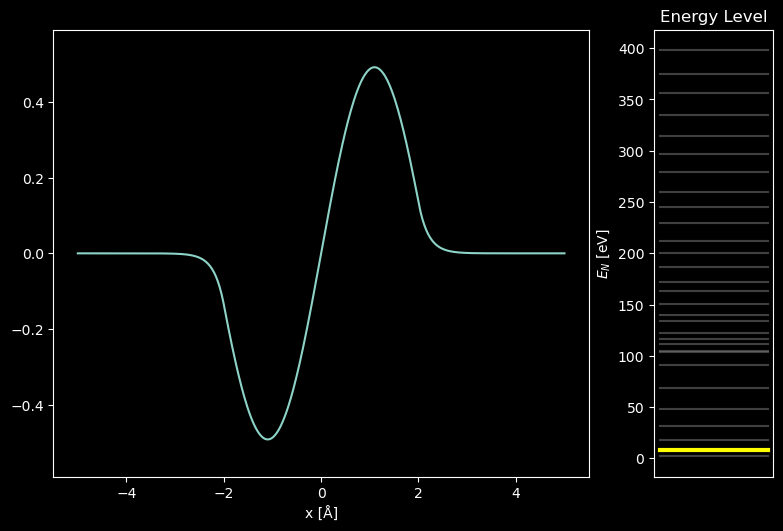

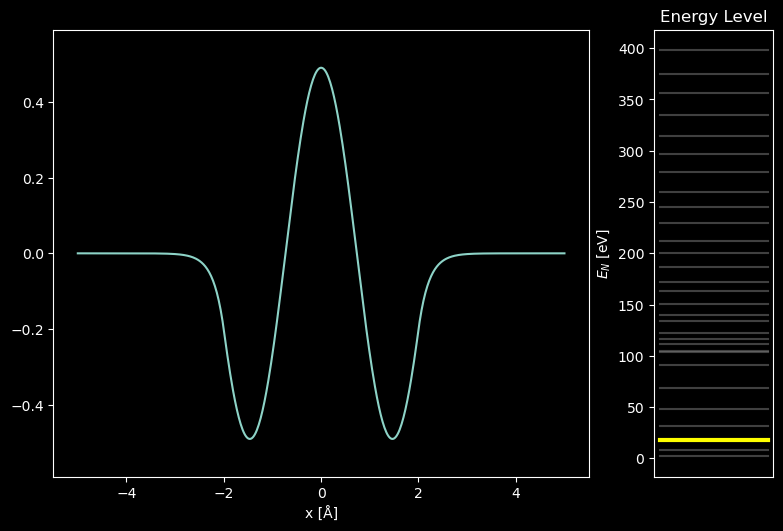

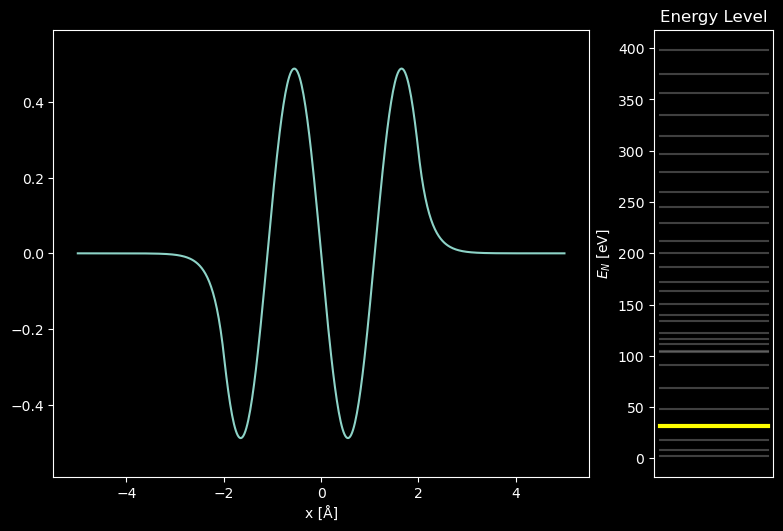

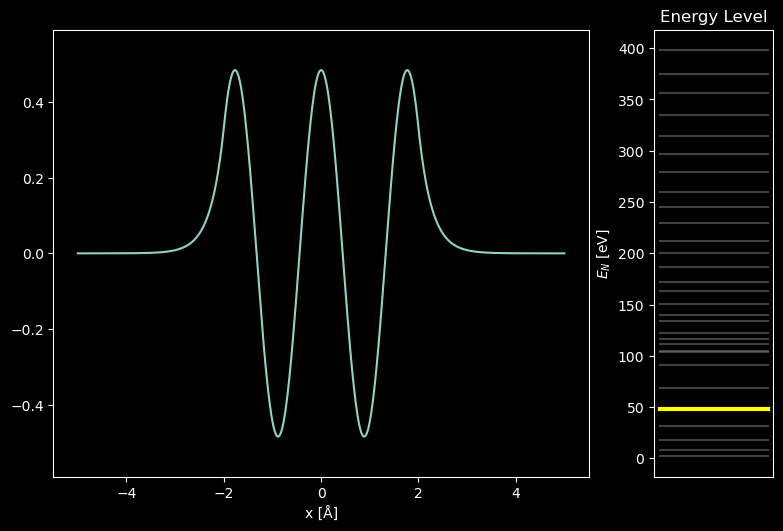

In [27]:
def finite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 2*Å
    potential[out_of_bounds] = 100*eV
    return potential

H_sw = Hamiltonian(particles = SingleParticle(), potential = finite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)
visualization_sw.plot_eigenstate(2)
visualization_sw.plot_eigenstate(3)
visualization_sw.plot_eigenstate(4)

11. No; it can only escape the well if its energy is great enough, and since energy is a function of n, there is a minimum n that a particle must have in order to be able to escape.